# Image Preprocessing

# 1. Portralt Generation Module

In [4]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
# Read the input image 
img = cv2.imread('test_pic.jpg') 
  
# Convert into grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the cascade 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')  

# Detect faces 
faces = face_cascade.detectMultiScale(gray, 1.1, 4) 
# Draw rectangle around the faces and crop the faces 
for (x, y, w, h) in faces: 
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2) 
    faces = img[y:y + h, x:x + w] 
    cv2.imwrite('face.jpg', faces) 

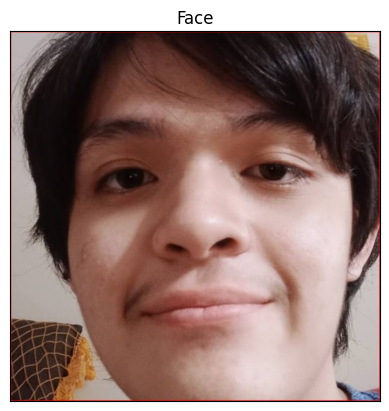

In [10]:
def show_rgb_image(image, title=None, conversion = cv2.COLOR_BGR2RGB):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image = cv2.cvtColor(image, conversion)

    # Show the image
    plt.imshow(image)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()

faces = cv2.imread('face.jpg')
show_rgb_image(faces, 'Face', cv2.COLOR_BGR2RGB)

# 2. Sketch Generation Module

In [21]:
import cv2
image = cv2.imread('face.jpg')  # loads an image from the specified file
# convert an image from one color space to another
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(grey_img)  # helps in masking of the image
# sharp edges in images are smoothed while minimizing too much blurring
blur = cv2.GaussianBlur(invert, (25, 25), 0)
invertedblur = cv2.bitwise_not(blur)
sketch = cv2.divide(grey_img, invertedblur, scale=256.0)
cv2.imwrite("sketch.png", sketch)  # converted image is saved as mentioned name
cv2.imshow('Sketch pic', sketch)
cv2.waitKey(0)        
 
# # Destroying present windows on screen
cv2.destroyAllWindows() 
